In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
file_path = "myopia.csv"

In [3]:
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
df2 = df.drop("MYOPIC", axis=1)
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [ ]:
#df3 = df2.dropna()
#df3.head()

In [ ]:
# Find null values
#for column in df3.columns:
    #print(f"Column {column} has {df3[column].isnull().sum()} null values")


In [5]:
scaled = StandardScaler().fit_transform(df2)
print(scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [6]:
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
df2_pca = pca.fit_transform(scaled)

In [7]:
df2_pca.shape

(618, 10)

In [8]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [9]:
tsne = TSNE(learning_rate=35, perplexity = 50)

In [10]:
tsne_features = tsne.fit_transform(df2)

/Users/halghazouli/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [11]:
tsne_features.shape

(618, 2)

In [12]:
df2['x'] = tsne_features[:,0]
df2['y'] = tsne_features[:,1]

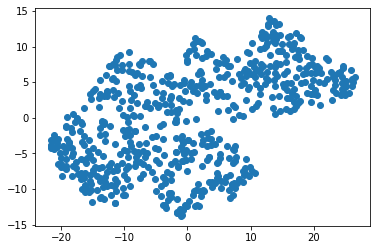

In [13]:
plt.scatter(df2['x'], df2['y'])
plt.show()

In [14]:
labels = df['MYOPIC']

In [15]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

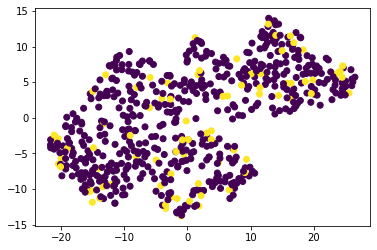

In [16]:
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

In [17]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418
9,10,4483.539918


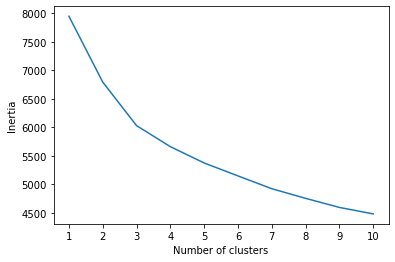

In [18]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    df["MYOPIC"] = model.labels_

    return data

In [20]:
clusters = get_clusters(5, df2)

In [21]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1.197537,11.240625
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-15.462546,-5.163917
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-8.525331,0.238910
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,7.792312,8.277336
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-15.381889,3.372173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,14.941360,9.416142
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,-15.529459,-3.081698
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-19.226292,-1.103481
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,4.619606,-8.454045
